In [7]:
base = "/home/arapat/workspace/research/boosting/data/core/"

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt

In [22]:
%run ipynb_src/per_iter_load.py

# The effect of resampling

In the following graph, we sampled 375k training examples, which is close to 1% of all training examples. The graphs monitor three metrics:

1. The area under precision-recall curve (auPRC): the final goal of the algorithm is to maximize auPRC.
2. Effective count: Initiallly, the distribution of weights is uniformly distributed among examples. As the number of iterations increases, the distribution of weights will concentrate on difficult examples. In the case that most of the examples are easy, the number of difficult examples in the sample data set might be too small to produce a generalizable rule. In the other words, we will observe overfitting after certain number of iterations, even the size of sample set is reasonably large. Therefore, it makes sense to define Effective Count of training examples to measure the effective number of examples that the algorithm is focusing on. (TODO: definition of effective count)
3. Average score: average score is the direct metric that the boosting procedure is optimizing. We expect a model that can achieve low average score will also have large auPRC.

# Experiment 1

In the following grpah, we show the three metrics as the function of iterations.

The segment between blue and red vertical line indicate that the algorithm detected that the new nodes were overfitting to the training set. All new nodes in these ranges were removed from the final model. In addition, a resampling happened after the iteration indicated by the red vertical line to overcome overfitting.

In [34]:
%run ipynb_src/per_iter_plot.py

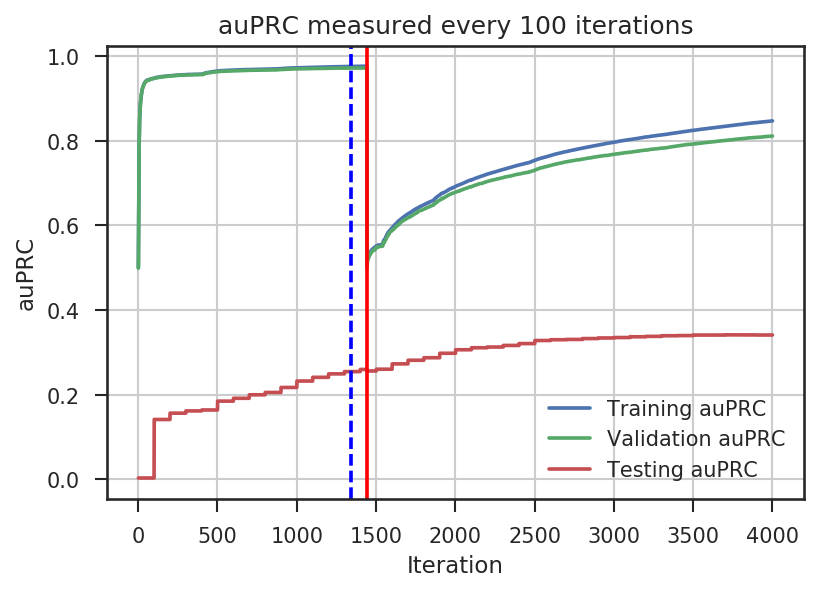

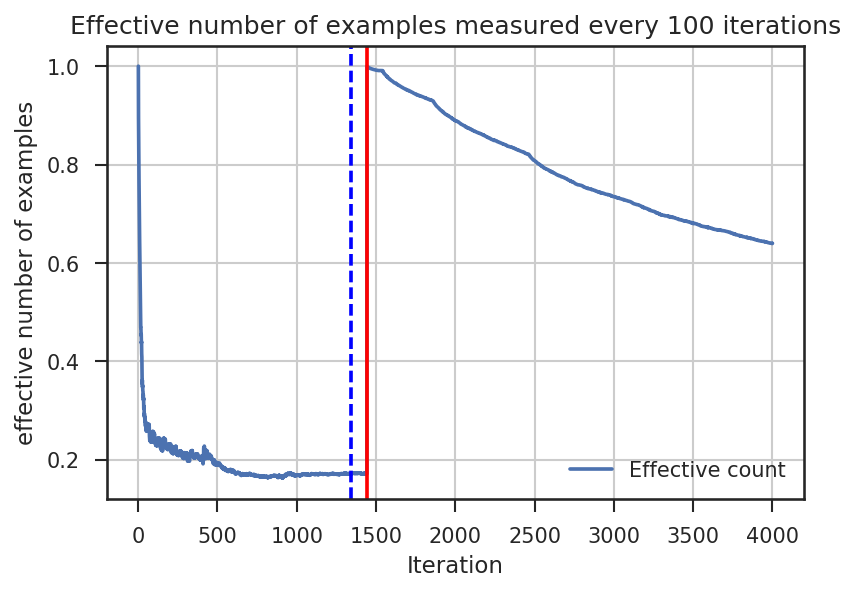

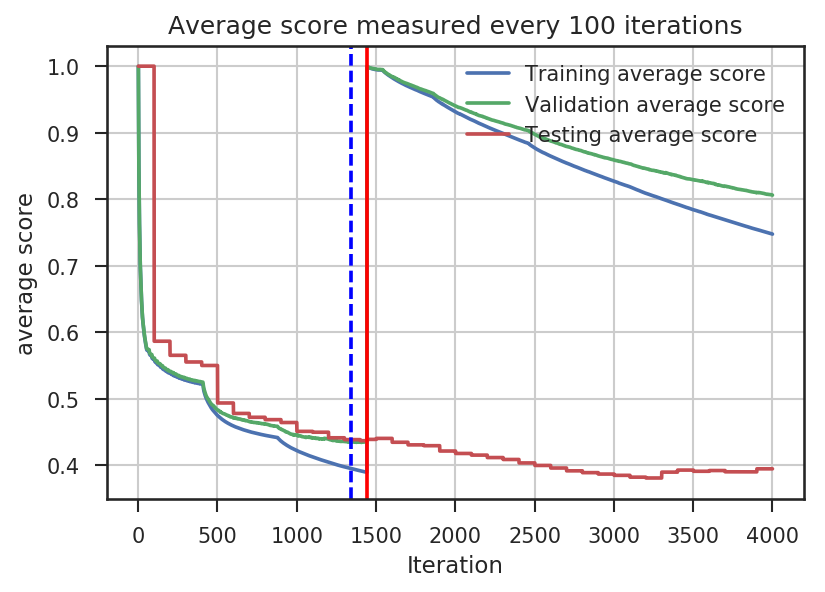

In [35]:
plotSample(labels, joint1, rollback1, 1.0, False)

## Improvement on the Precision-Recall

We plot the Precision-Recall curve every 1000 iteration on the actual testing data set.

In [25]:
# file generation:
#   grep 'Node\|Testing (ref) PR =\|Testing (ref) auPRC = 0' result-010.txt > testPR.txt

%run ipynb_src/auprc_funcs.py

In [26]:
data = extractTestInfo(base + "../others/testPR.txt")

In [36]:
%run ipynb_src/auprc_funcs.py

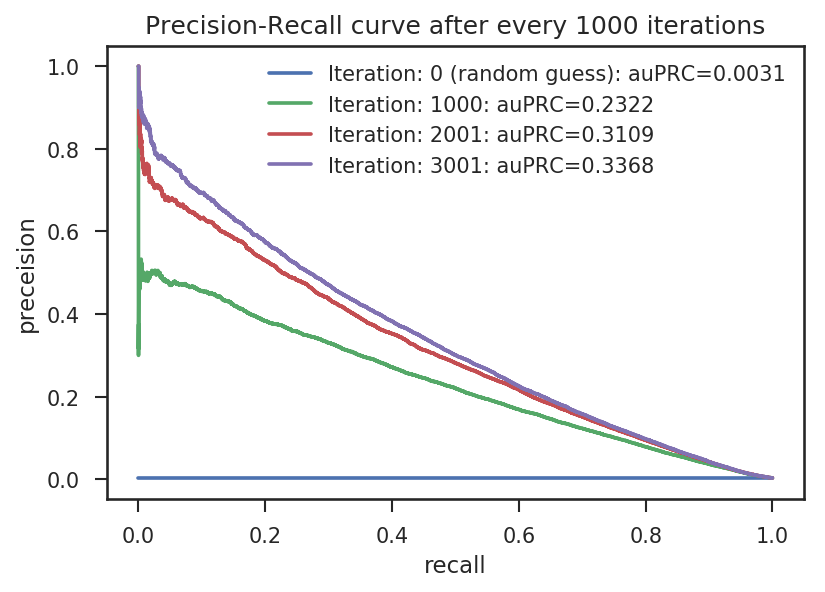

In [37]:
plot(data[:4])

# Visualize ADTree as sequence logo

In [34]:
%matplotlib inline
%run ipynb_src/seq_logo.py

In [35]:
base = "/home/arapat/workspace/research/boosting/experiments/splice-site/data/auto/core/"

In [36]:
# filepath = base + "../others/desc-010-L1.txt"
filepath = base + "../desc/desc-010-L1.txt"
scores = getScores(filepath)

In [37]:
pscores = []
for i in range(len(scores[0])):
    r = []
    for t in scores[0][i]:
        r.append((t[0], t[2], t[1]))
    for t in scores[1][i]:
        r.append((t[0], -t[2], t[1]))
    pscores.append(r)

line 64
line 72
line 109
line 118
line 159


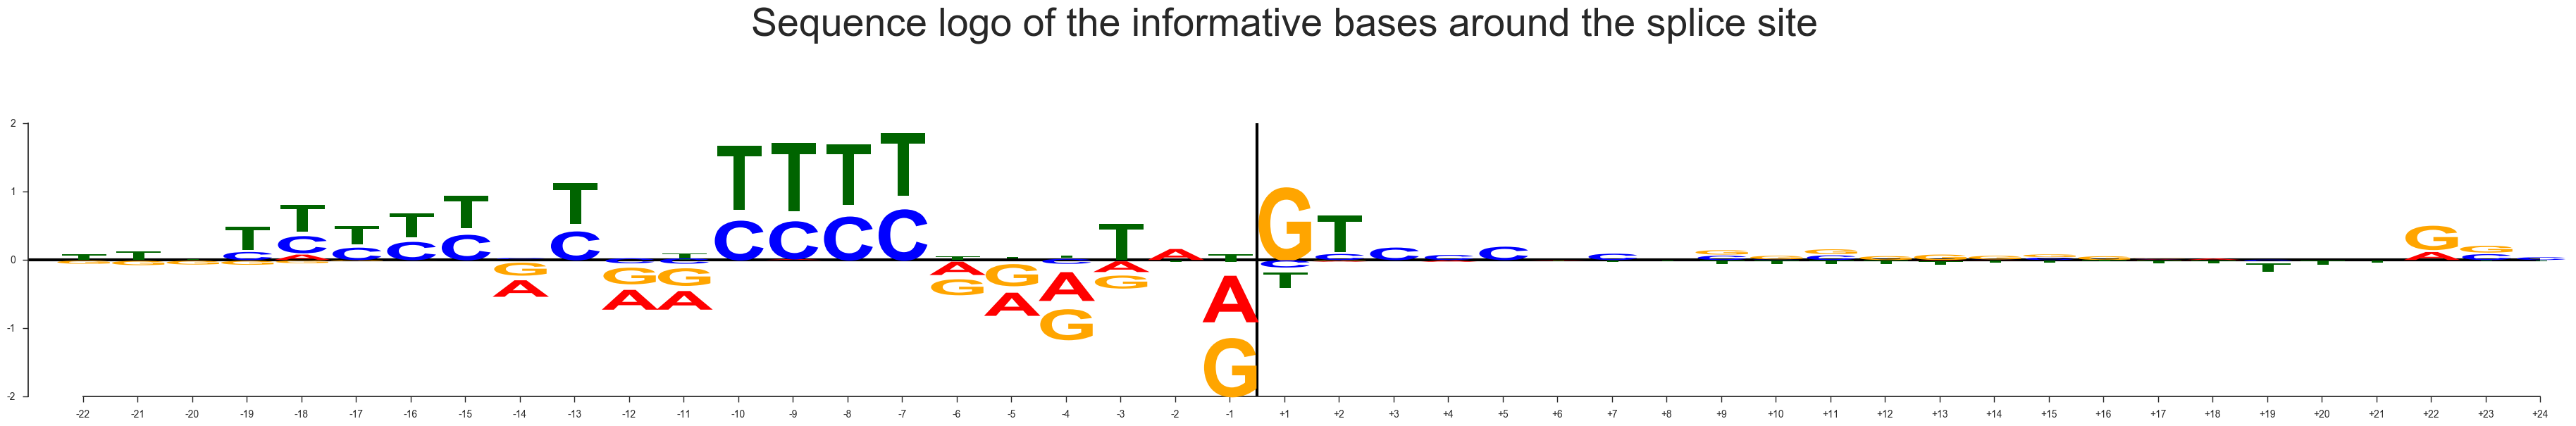

In [38]:
draw_logo(pscores[37:83], list(range(37, 83)))